In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"]=(10,6)

sns.set_style("whitegrid") # grafiklerin arka plan rengini belirler
pd.set_option("display.float_format", lambda x :"%.3f" % x) # float verileri outputda 3basamak yazdirir

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None) # tüm data setini gösterecek

## <p style="background-color:#3342ff; font-family:arial; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA) on Titanic Dataset</p>


# Aim

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms
1. Analyzing the features according to survival status (target feature)
2. Preparing data to create a model that will predict the survival status of people (So the "survive" feature is the target feature)

## <p style="background-color:#3342ff; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Reading & Understanding Data</p>



In [240]:
df0 = pd.read_csv(r"titanic.csv", sep = "\t")
df = df0.copy()

In [241]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [242]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000,0,0,PC 17601,27.721,NaN,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.000,0,0,STON/O 2. 3101294,7.925,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000,5,2,CA 2144,46.900,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.000,1,2,C.A. 2315,20.575,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.000,0,0,345779,9.500,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000,2,0,3101276,7.925,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.000,0,0,343276,8.050,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.000,1,0,W.E.P. 5734,61.175,E31,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000,5,2,CA 2144,46.900,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.000,3,0,3101278,15.850,NaN,S


In [243]:
df.shape

(156, 12)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [245]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000,156.000,156.000,126.000,156.000,156.000,156.000
mean,78.500,0.346,2.423,28.142,0.615,0.397,28.110
std,45.177,0.477,0.795,14.614,1.056,0.870,39.401
min,1.000,0.000,1.000,0.830,0.000,0.000,6.750
25%,39.750,0.000,2.000,19.000,0.000,0.000,8.003
50%,78.500,0.000,3.000,26.000,0.000,0.000,14.454
75%,117.250,1.000,3.000,35.000,1.000,0.000,30.372
max,156.000,1.000,3.000,71.000,5.000,5.000,263.000


In [246]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Braund, Mr. Owen Harris",male,2651,C23 C25 C27,S
freq,1,100,2,2,110


In [247]:
df.describe(include="object").T

,count,unique,top,freq
Name,156,156,"Braund, Mr. Owen Harris",1
Sex,156,2,male,100
Ticket,156,145,2651,2
Cabin,31,28,C23 C25 C27,2
Embarked,155,3,S,110


In [248]:
df.describe().T #we can compare the mean and std of numerical featurettes 

,count,mean,std,min,25%,50%,75%,max
PassengerId,156.000,78.500,45.177,1.000,39.750,78.500,117.250,156.000
Survived,156.000,0.346,0.477,0.000,0.000,0.000,1.000,1.000
Pclass,156.000,2.423,0.795,1.000,2.000,3.000,3.000,3.000
Age,126.000,28.142,14.614,0.830,19.000,26.000,35.000,71.000
SibSp,156.000,0.615,1.056,0.000,0.000,0.000,1.000,5.000
Parch,156.000,0.397,0.870,0.000,0.000,0.000,0.000,5.000
Fare,156.000,28.110,39.401,6.750,8.003,14.454,30.372,263.000


In [249]:
df.isnull().sum() # shows the number of Nan values in each column 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [250]:
df.isnull().sum() / df.shape[0] * 100 #  shows how many values are Nan in % 
# to see the values in %, we can get the NaN values by dividing by the number of line elements and multiplying by 100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.231
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         80.128
Embarked       0.641
dtype: float64

In [251]:
df.isnull().mean() * 100 # here we can take the average of the ones and multiply by 100 to get the % value
# isnull returns True False returns 1 and 0 

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.231
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         80.128
Embarked       0.641
dtype: float64

In [252]:
df[df["Embarked"].isnull()] # Return whichever value is NaN from the Embark column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN


<Axes: >

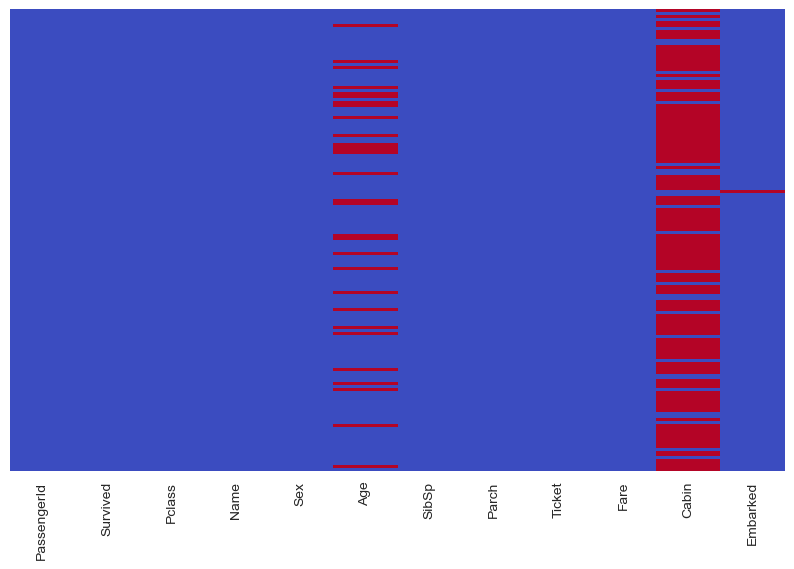

In [253]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="coolwarm") 
# Plot Nan values

In [254]:
object_col = df.select_dtypes(include="object") # Selection of categorical features
object_col

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
151,"Pears, Mrs. Thomas (Edith Wearne)",female,113776,C2,S
152,"Meo, Mr. Alfonzo",male,A.5. 11206,NaN,S
153,"van Billiard, Mr. Austin Blyler",male,A/5. 851,NaN,S
154,"Olsen, Mr. Ole Martin",male,Fa 265302,NaN,S


In [255]:
object_col = df.select_dtypes(include="object").columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [256]:
for col in object_col:
    print(col)
    print("--" * 8)
    print(df[col].value_counts(dropna=False)) # Count the number of unique categorical values and order them from the smallest to the largest.
print("--" * 20)

Name
----------------
Name
Braund, Mr. Owen Harris                               1
Moss, Mr. Albert Johan                                1
Petranec, Miss. Matilda                               1
Petroff, Mr. Pastcho ("Pentcho")                      1
White, Mr. Richard Frasar                             1
                                                     ..
Harper, Mrs. Henry Sleeper (Myna Haxtun)              1
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)    1
Ostby, Mr. Engelhart Cornelius                        1
Woolner, Mr. Hugh                                     1
Williams, Mr. Charles Duane                           1
Name: count, Length: 156, dtype: int64
Sex
----------------
Sex
male      100
female     56
Name: count, dtype: int64
Ticket
----------------
Ticket
2651               2
237736             2
35281              2
19950              2
CA 2144            2
                  ..
14311              1
370371             1
S.C./A.4. 23567    1
330958             

## <p style="background-color:#3342ff; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Detailed Examination of Data Column by Column</p>




## Age

Lets examine the Age column and decide how we will handle with missing values.

In [257]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000,1,0,113776,66.600,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.500,0,0,A.5. 11206,8.050,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.500,0,2,A/5. 851,14.500,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.312,NaN,S


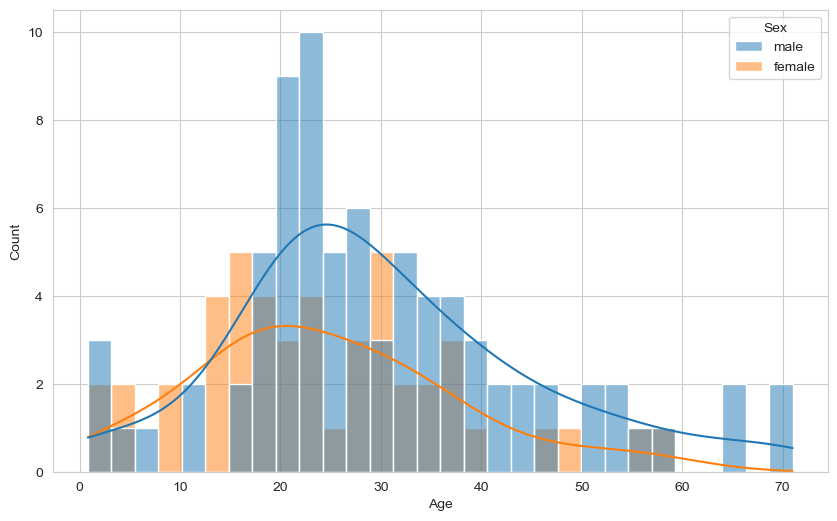

In [258]:
sns.histplot(data = df, x ="Age", kde=True, bins = 30, hue ="Sex");

In [259]:
mean = df.Age.mean()
mean

28.141507936507935

In [260]:
median = df.Age.median()
median

26.0

In [261]:
print(f"Age mean is..: {mean} \nAge median is..: {median}")
# print("Age mean is ..:{} \nAge median is..: {}".format(mean,median))

Age mean is..: 28.141507936507935 
Age median is..: 26.0


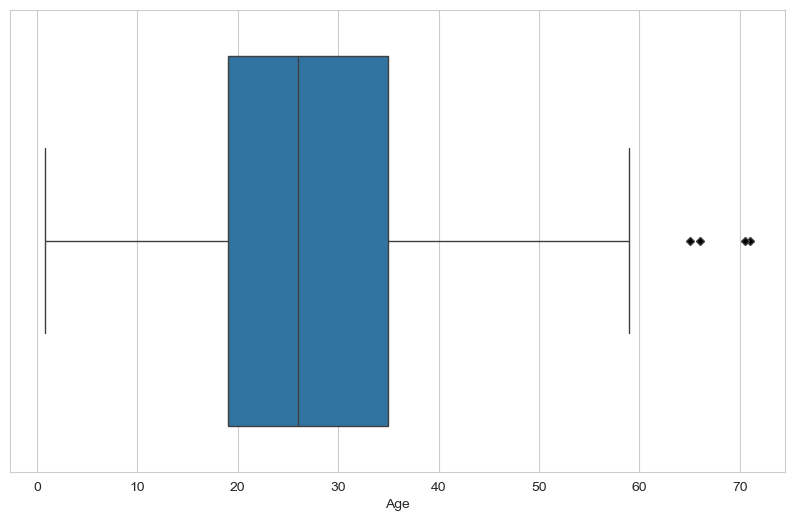

In [262]:
sns.boxplot(data=df, x = "Age",flierprops={"marker": "D", "markerfacecolor": "k", "markersize": 4},);

In [263]:
df.groupby("Pclass").Age.median() #  group by class and show the median of their age

Pclass
1   38.000
2   29.000
3   22.000
Name: Age, dtype: float64

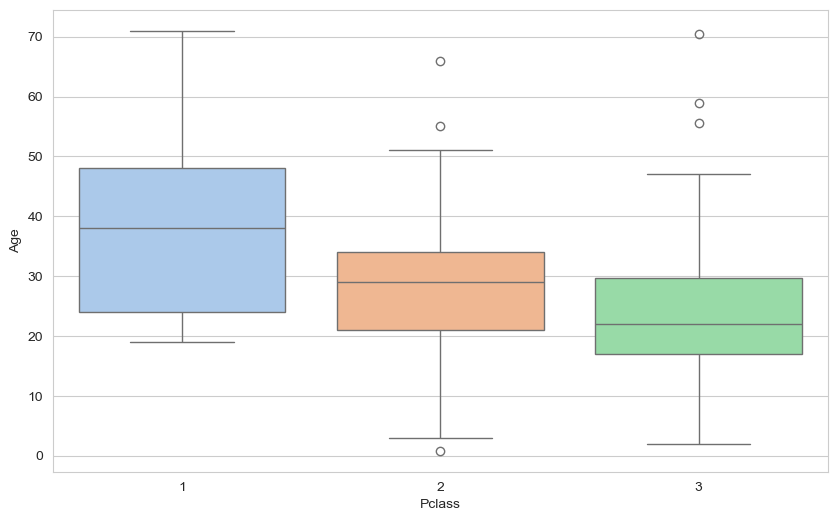

In [264]:
sns.boxplot(data = df, x = "Pclass", y = "Age", palette="pastel");

In [265]:
df.groupby(["Pclass","Sex"]).Age.median()

Pclass  Sex   
1       female   36.500
        male     40.000
2       female   28.000
        male     32.000
3       female   19.000
        male     24.000
Name: Age, dtype: float64

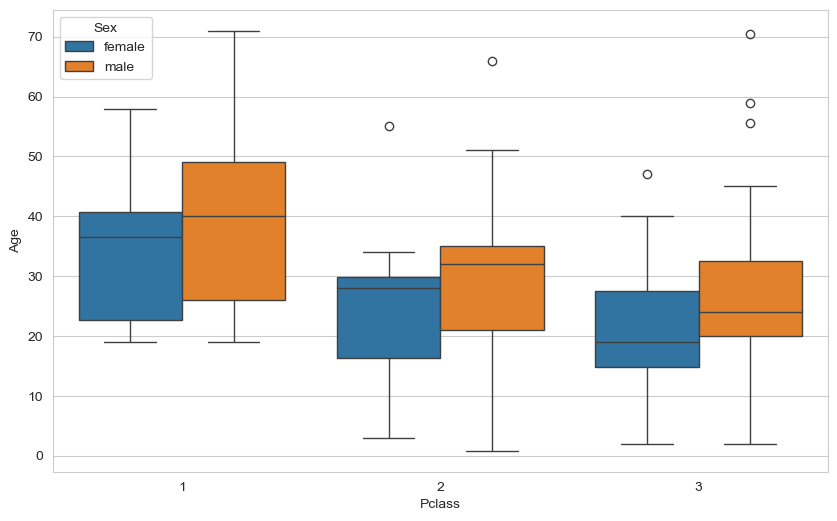

In [266]:
sns.boxplot(data = df, x="Pclass", y ="Age", hue ="Sex");

In [267]:
df.groupby(["Pclass", "Sex"]).Age.transform("median")

0     24.000
1     36.500
2     19.000
3     36.500
4     24.000
       ...  
151   36.500
152   24.000
153   24.000
154   24.000
155   40.000
Name: Age, Length: 156, dtype: float64

In [268]:
df["Age"] = df["Age"].fillna(df.groupby(["Pclass","Sex"]).Age.transform("median"))

In [269]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

## Cabin

77 percent of the Cabin data are missing. We can't fill these missing values accurately enough. So let's drop this column.

In [270]:
df.drop("Cabin", axis=1, inplace=True) # if a column is not useful to us and contains too many NaN values, we can drop it

## Embarked

There is just 1 missing value in Embarked column and we can't fill this missing value accurately enough. So let's drop just this row.

In [271]:
df.dropna(inplace=True)

In [272]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Survive (target feature)

In [273]:
df.Survived.value_counts()

Survived
0    102
1     53
Name: count, dtype: int64

In [274]:
df.Survived.value_counts(normalize = True)

Survived
0   0.658
1   0.342
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

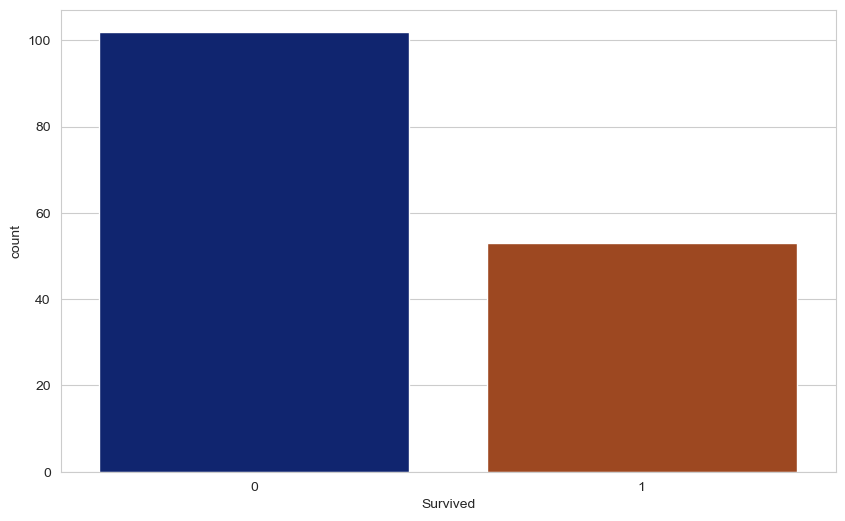

In [275]:
sns.countplot(data=df, x ="Survived", palette="dark")

### Let's examine the affect of each feature on survival status

### Sex

In [276]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           39
        0           16
male    0           86
        1           14
Name: count, dtype: int64

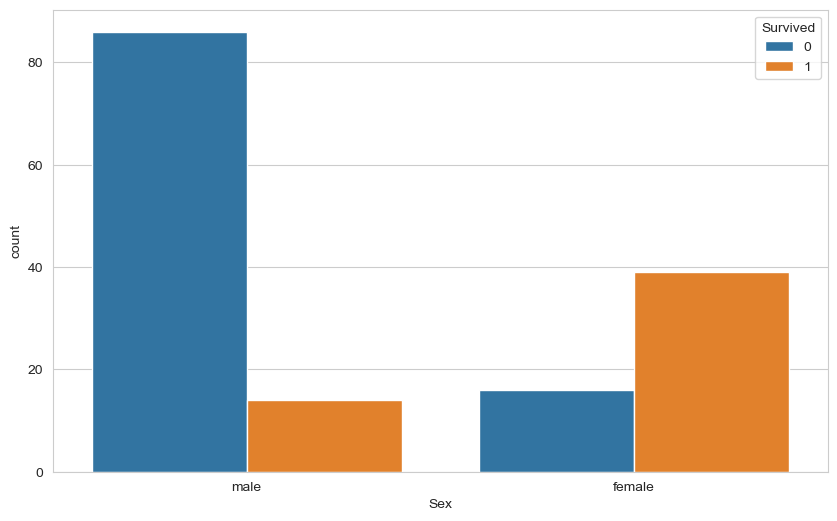

In [277]:
sns.countplot(data=df, x = "Sex", hue ="Survived");

In [278]:
df.groupby("Sex").Survived.value_counts(normalize=True)

Sex     Survived
female  1          0.709
        0          0.291
male    0          0.860
        1          0.140
Name: proportion, dtype: float64

In [279]:
survive = df.groupby("Sex").Survived.value_counts(normalize=True)
survive

Sex     Survived
female  1          0.709
        0          0.291
male    0          0.860
        1          0.140
Name: proportion, dtype: float64

In [280]:
pd.DataFrame(survive)

proportion
Sex    Survived            
female 1              0.709
       0              0.291
male   0              0.860
       1              0.140

In [281]:
survive = pd.DataFrame(survive)
survive.rename(columns={"proportion":"ratio"}, inplace=True)
survive.reset_index(inplace=True)
survive

,Sex,Survived,ratio
0,female,1,0.709
1,female,0,0.291
2,male,0,0.860
3,male,1,0.140


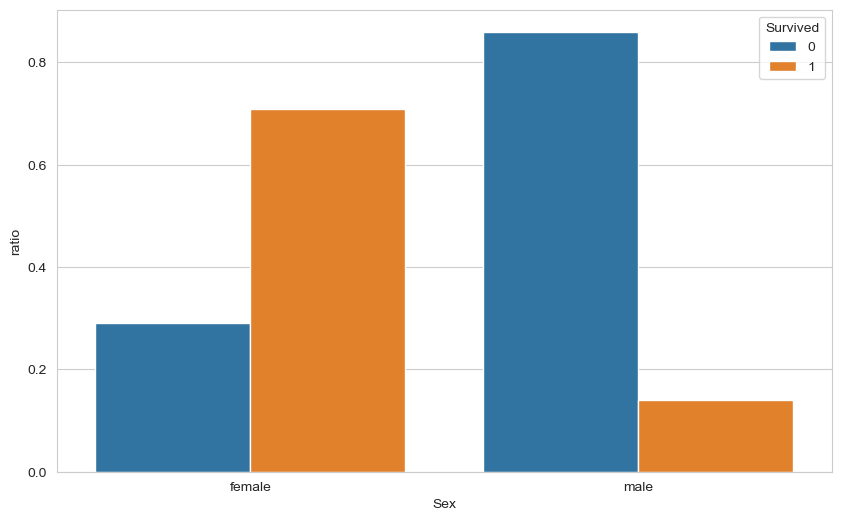

In [282]:
sns.barplot(data = survive, x ="Sex", y = "ratio", hue = "Survived", ci = None);

### Pclass

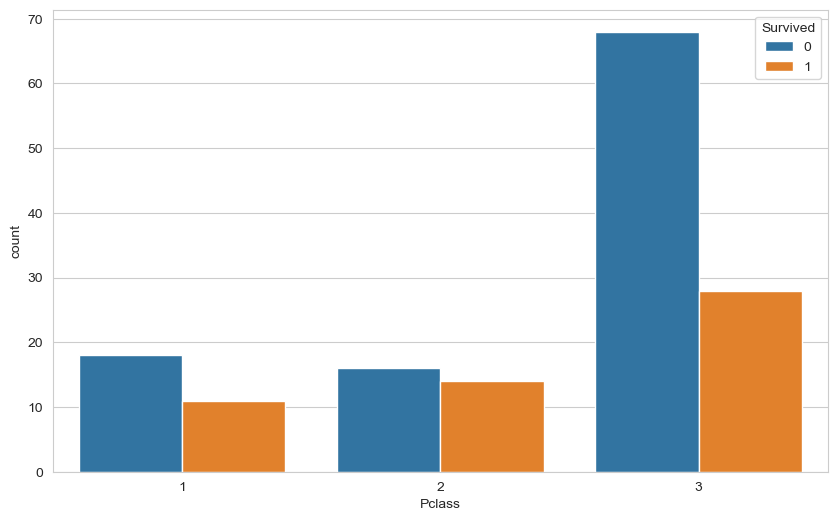

In [283]:
sns.countplot(data = df, x ="Pclass", hue ="Survived");

### SibSp

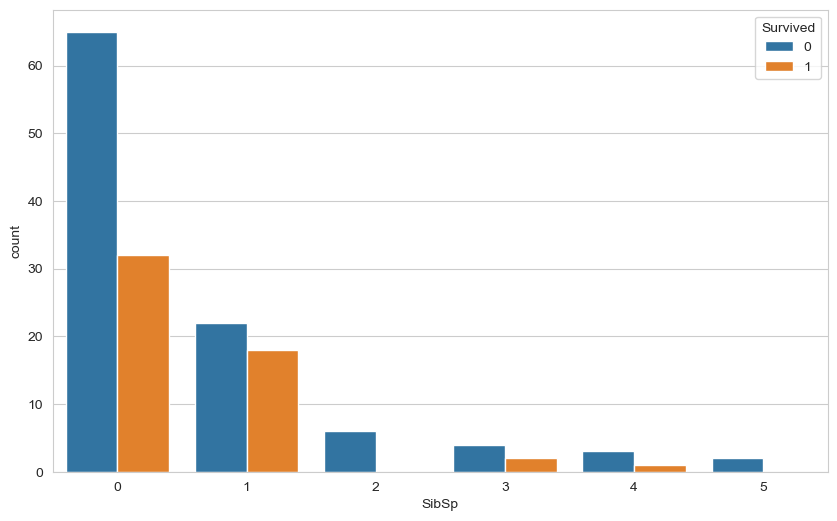

In [284]:
sns.countplot(data = df, x ="SibSp", hue = "Survived");

### Parch

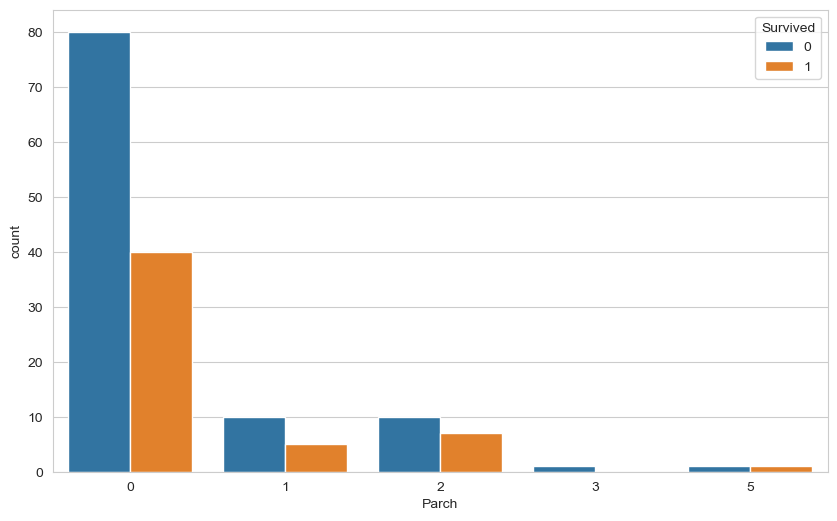

In [285]:
sns.countplot(data = df, x="Parch", hue = "Survived");

### Embarked

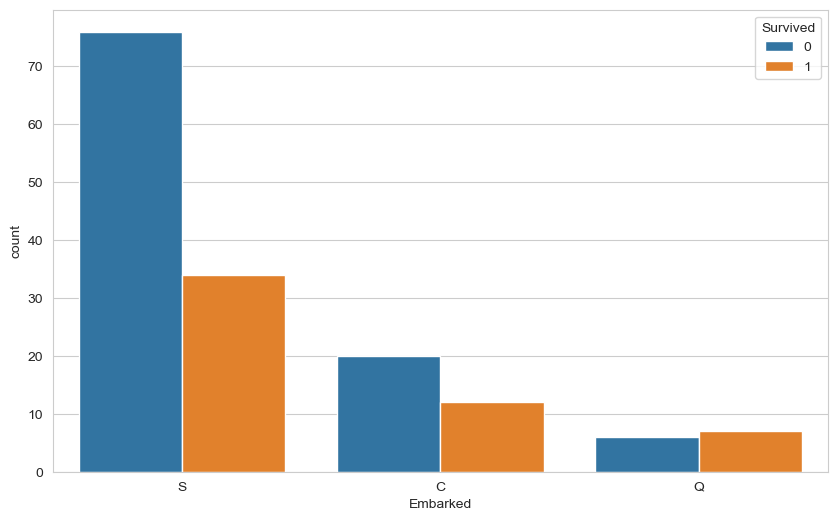

In [286]:
sns.countplot(data = df, x = "Embarked", hue ="Survived");

### Age

In [287]:
df.groupby("Survived").Age.median()

Survived
0   24.000
1   24.000
Name: Age, dtype: float64

In [288]:
df.groupby("Survived").Age.mean()

Survived
0   28.574
1   25.016
Name: Age, dtype: float64

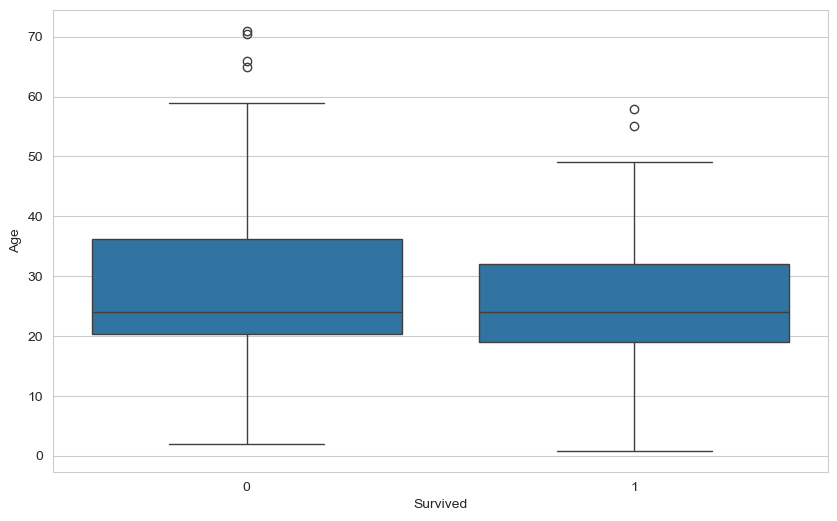

In [289]:
sns.boxplot(data = df, x = "Survived", y = "Age");

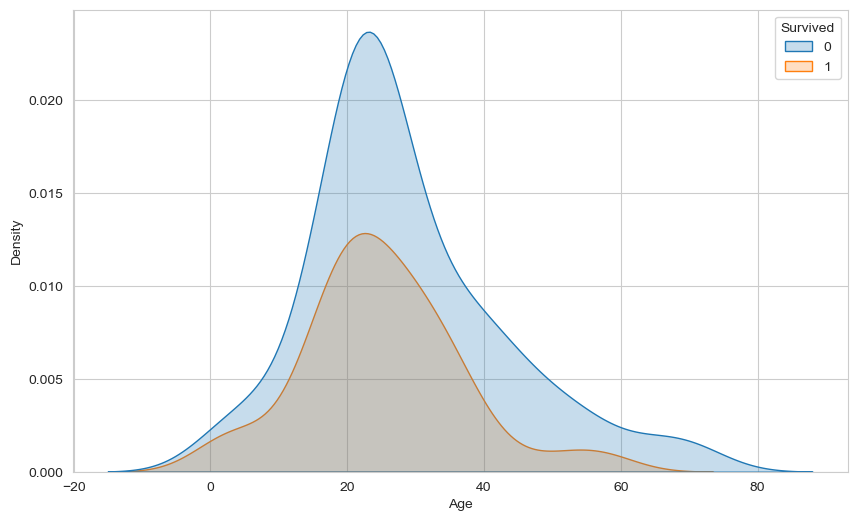

In [290]:
sns.kdeplot(data = df, x = "Age", hue = "Survived", fill = True);

### Fare

In [291]:
df.groupby("Survived").Fare.median()

Survived
0   13.727
1   15.246
Name: Fare, dtype: float64

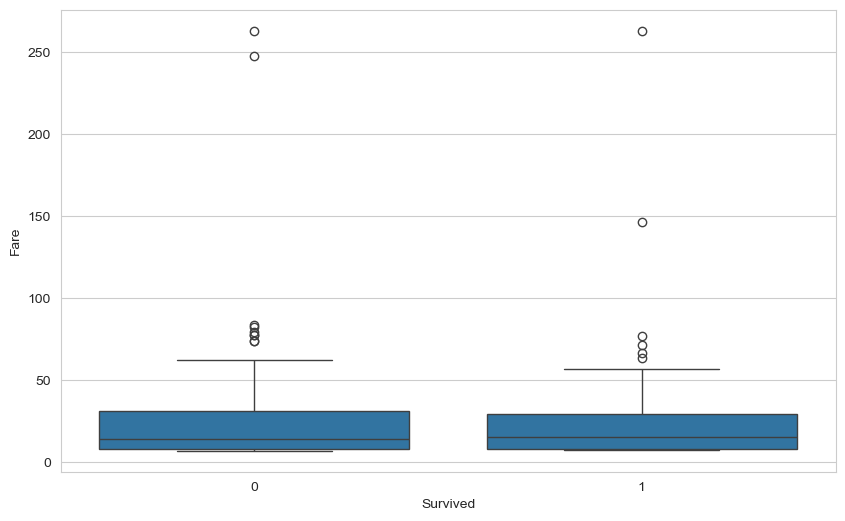

In [292]:
sns.boxplot(data = df, x = "Survived", y = "Fare") ;

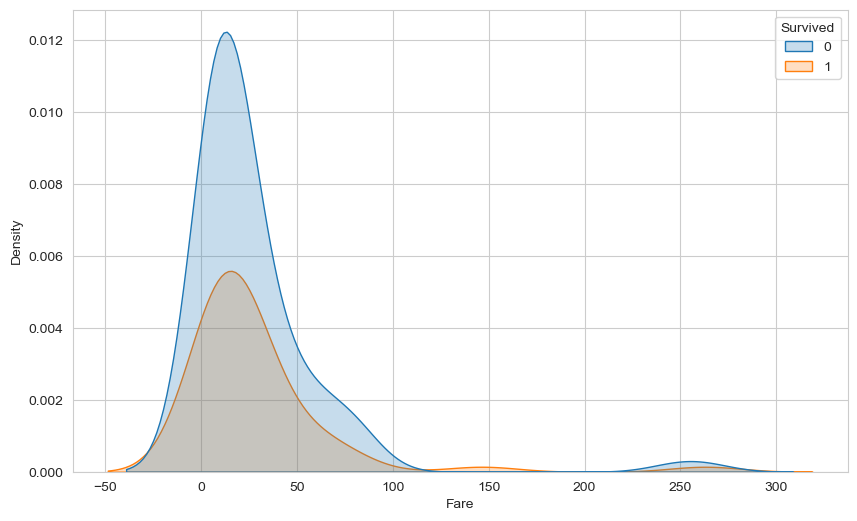

In [293]:
sns.kdeplot(data = df, x = "Fare", hue ="Survived", fill = True);

## <p style="background-color:#3342ff; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Some Feature Engineering</p>



### From "Ticket" to "is_group"

In [294]:
df.Ticket.value_counts(dropna = False).sample(10)

Ticket
PC 17759    1
330959      1
PC 17569    1
PC 17754    1
315151      1
248706      1
347742      1
330923      1
335677      1
230080      1
Name: count, dtype: int64

In [295]:
df.Ticket.value_counts(dropna = False).tail(10)

Ticket
PC 17572           1
A/4. 39886         1
3101295            1
349237             1
2662               1
14311              1
370371             1
S.C./A.4. 23567    1
330958             1
PC 17597           1
Name: count, dtype: int64

In [296]:
ticket = df.Ticket.value_counts()
ticket

Ticket
2651               2
W./C. 6608         2
35281              2
19950              2
CA 2144            2
                  ..
14311              1
370371             1
S.C./A.4. 23567    1
330958             1
PC 17597           1
Name: count, Length: 144, dtype: int64

In [297]:
ticket[ticket != 1]

Ticket
2651            2
W./C. 6608      2
35281           2
19950           2
CA 2144         2
347082          2
S.O.C. 14879    2
237736          2
11668           2
349909          2
113803          2
Name: count, dtype: int64

In [298]:
group_list = list(ticket[ticket != 1].index)
group_list

['2651',
 'W./C. 6608',
 '35281',
 '19950',
 'CA 2144',
 '347082',
 'S.O.C. 14879',
 '237736',
 '11668',
 '349909',
 '113803']

In [299]:
df.Ticket.isin(group_list) * 1

0      0
1      0
2      0
3      1
4      0
      ..
151    0
152    0
153    0
154    0
155    0
Name: Ticket, Length: 155, dtype: int32

In [300]:
df["is_group"] = df.Ticket.isin(group_list) * 1
df.is_group

0      0
1      0
2      0
3      1
4      0
      ..
151    0
152    0
153    0
154    0
155    0
Name: is_group, Length: 155, dtype: int32

In [301]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000,1,0,113776,66.600,S,0
152,153,0,3,"Meo, Mr. Alfonzo",male,55.500,0,0,A.5. 11206,8.050,S,0
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.500,0,2,A/5. 851,14.500,S,0
154,155,0,3,"Olsen, Mr. Ole Martin",male,24.000,0,0,Fa 265302,7.312,S,0


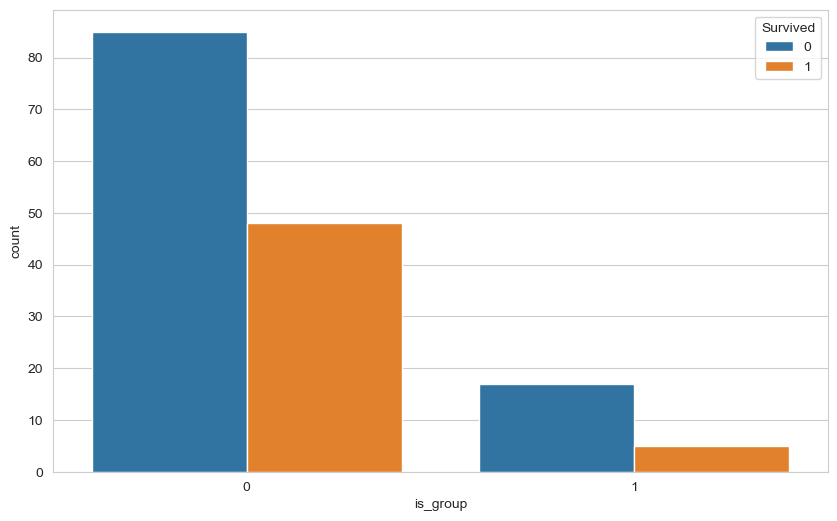

In [302]:
sns.countplot(data = df, x = "is_group", hue = "Survived");

### From "SibSp" and "Parch" to "is_alone"

In [303]:
((df.SibSp == 0) & (df.Parch) == 0)

0       True
1       True
2       True
3       True
4       True
       ...  
151     True
152     True
153     True
154     True
155    False
Length: 155, dtype: bool

In [304]:
True * 1

1

In [305]:
False * 1

0

In [306]:
df["is_alone"] = ((df.SibSp == 0) & (df.Parch == 0)) * 1
df.is_alone

0      0
1      0
2      1
3      0
4      1
      ..
151    0
152    1
153    0
154    1
155    0
Name: is_alone, Length: 155, dtype: int32

In [307]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,0,1


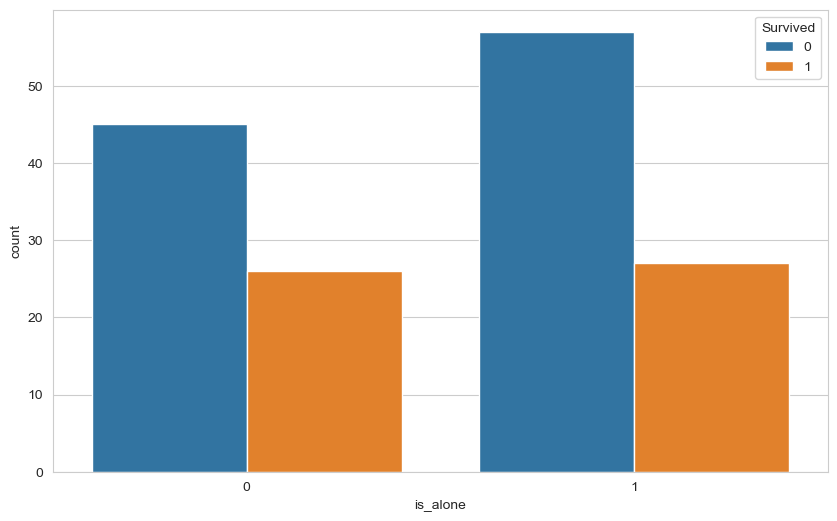

In [308]:
sns.countplot(data = df, x = "is_alone", hue = "Survived");

**Let's see the relationship between "is_group" and "is_alone" features.**

In [309]:
df.groupby("is_group").is_alone.value_counts()

is_group  is_alone
0         1           83
          0           50
1         0           21
          1            1
Name: count, dtype: int64

## Let's implement some useful methods on "Name" and "Ticket" features

### Name

In [310]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
151                    Pears, Mrs. Thomas (Edith Wearne)
152                                     Meo, Mr. Alfonzo
153                      van Billiard, Mr. Austin Blyler
154                                Olsen, Mr. Ole Martin
155                          Williams, Mr. Charles Duane
Name: Name, Length: 155, dtype: object

In [311]:
df.Name.sample(10)

32                 Glynn, Miss. Mary Agatha
115                   Pekoniemi, Mr. Edvard
98     Doling, Mrs. John T (Ada Julia Bone)
42                      Kraeff, Mr. Theodor
68          Andersson, Miss. Erna Alexandra
88               Fortune, Miss. Mabel Helen
143                     Burke, Mr. Jeremiah
135                      Richard, Mr. Emile
0                   Braund, Mr. Owen Harris
19                  Masselmani, Mrs. Fatima
Name: Name, dtype: object

In [312]:
df.Name.str.extract("\w+\.\s(\w*\s\w*)")

,0
0,Owen Harris
1,John Bradley
2,NaN
3,Jacques Heath
4,William Henry
...,...
151,Thomas
152,NaN
153,Austin Blyler
154,Ole Martin


In [313]:
df["Name"] = df.Name.str.extract("\w+\.\s(\w*\s*\w*)")

In [314]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,Owen Harris,male,22.000,1,0,A/5 21171,7.250,S,0,0
1,2,1,1,John Bradley,female,38.000,1,0,PC 17599,71.283,C,0,0
2,3,1,3,Laina,female,26.000,0,0,STON/O2. 3101282,7.925,S,0,1
3,4,1,1,Jacques Heath,female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,William Henry,male,35.000,0,0,373450,8.050,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Thomas,female,22.000,1,0,113776,66.600,S,0,0
152,153,0,3,Alfonzo,male,55.500,0,0,A.5. 11206,8.050,S,0,1
153,154,0,3,Austin Blyler,male,40.500,0,2,A/5. 851,14.500,S,0,0
154,155,0,3,Ole Martin,male,24.000,0,0,Fa 265302,7.312,S,0,1


### Ticket

In [315]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
151              113776
152          A.5. 11206
153            A/5. 851
154           Fa 265302
155            PC 17597
Name: Ticket, Length: 155, dtype: object

In [317]:
df.Ticket.str.extract("(\d*)$")

#df.Ticket.str.replace("\S*\s", "")


,0
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
151,113776
152,11206
153,851
154,265302


In [318]:
df["Ticket"] = df.Ticket.str.extract("(\d*)$")


In [319]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,Owen Harris,male,22.000,1,0,21171,7.250,S,0,0
1,2,1,1,John Bradley,female,38.000,1,0,17599,71.283,C,0,0
2,3,1,3,Laina,female,26.000,0,0,3101282,7.925,S,0,1
3,4,1,1,Jacques Heath,female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,William Henry,male,35.000,0,0,373450,8.050,S,0,1


## <p style="background-color:#3342ff; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Unnecessary Features</p>



In [320]:
df_final = df.drop(['PassengerId', 'Name' , 'Ticket'], axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,1,0,7.250,S,0,0
1,1,1,female,38.000,1,0,71.283,C,0,0
2,1,3,female,26.000,0,0,7.925,S,0,1
3,1,1,female,35.000,1,0,53.100,S,1,0
4,0,3,male,35.000,0,0,8.050,S,0,1
...,...,...,...,...,...,...,...,...,...,...
151,1,1,female,22.000,1,0,66.600,S,0,0
152,0,3,male,55.500,0,0,8.050,S,0,1
153,0,3,male,40.500,0,2,14.500,S,0,0
154,0,3,male,24.000,0,0,7.312,S,0,1


In [321]:
df_final.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,is_group,is_alone
Survived,1.000,-0.102,-0.126,-0.062,0.044,0.018,-0.098,-0.047
Pclass,-0.102,1.000,-0.400,0.082,0.011,-0.602,-0.129,0.192
Age,-0.126,-0.400,1.000,-0.349,-0.194,0.060,-0.192,0.165
SibSp,-0.062,0.082,-0.349,1.000,0.398,0.279,0.462,-0.639
Parch,0.044,0.011,-0.194,0.398,1.000,0.260,0.323,-0.500
Fare,0.018,-0.602,0.060,0.279,0.260,1.000,0.337,-0.373
is_group,-0.098,-0.129,-0.192,0.462,0.323,0.337,1.000,-0.405
is_alone,-0.047,0.192,0.165,-0.639,-0.500,-0.373,-0.405,1.000


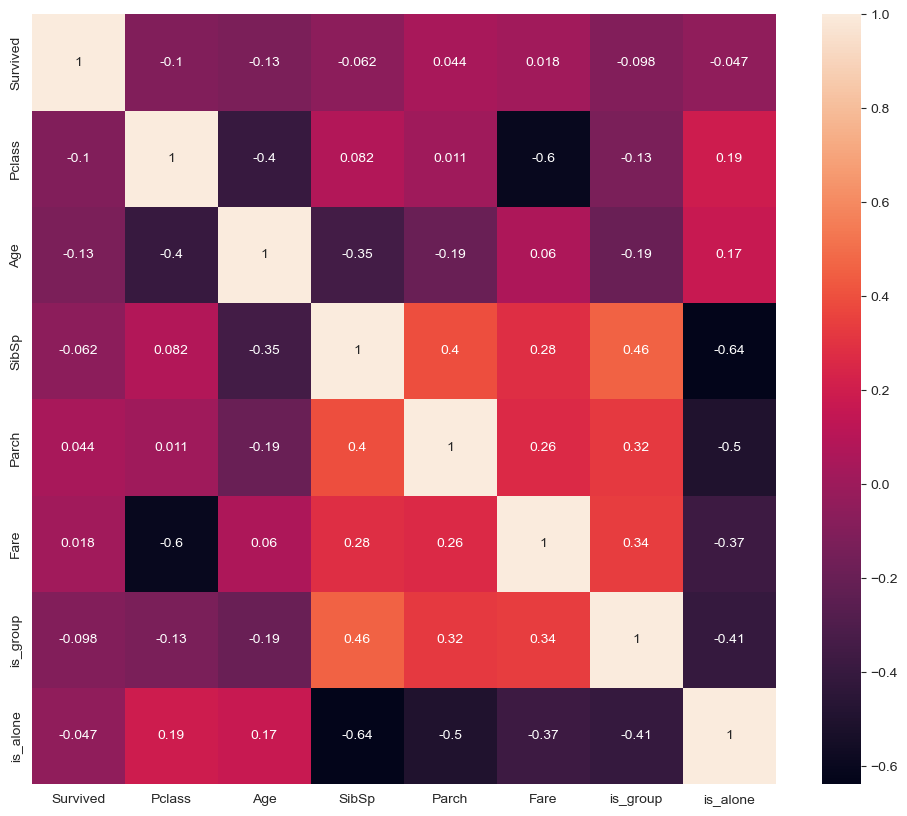

In [324]:
plt.figure(figsize= (12, 10))
sns.heatmap(df_final.corr(numeric_only=True), annot = True);

In [325]:
df_final = df_final.drop(["SibSp","Parch"], axis = 1)
df_final

,Survived,Pclass,Sex,Age,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,7.250,S,0,0
1,1,1,female,38.000,71.283,C,0,0
2,1,3,female,26.000,7.925,S,0,1
3,1,1,female,35.000,53.100,S,1,0
4,0,3,male,35.000,8.050,S,0,1
...,...,...,...,...,...,...,...,...
151,1,1,female,22.000,66.600,S,0,0
152,0,3,male,55.500,8.050,S,0,1
153,0,3,male,40.500,14.500,S,0,0
154,0,3,male,24.000,7.312,S,0,1


## <p style="background-color:#3342ff; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dummy Operation</p>

In [326]:
df_dummy = pd.get_dummies(data = df_final, drop_first = True, dtype = int)
df_dummy

,Survived,Pclass,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000,7.250,0,0,1,0,1
1,1,1,38.000,71.283,0,0,0,0,0
2,1,3,26.000,7.925,0,1,0,0,1
3,1,1,35.000,53.100,1,0,0,0,1
4,0,3,35.000,8.050,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
151,1,1,22.000,66.600,0,0,0,0,1
152,0,3,55.500,8.050,0,1,1,0,1
153,0,3,40.500,14.500,0,0,1,0,1
154,0,3,24.000,7.312,0,1,1,0,1


In [327]:
df_dummy = pd.get_dummies(data = df_dummy, columns=["Pclass"], drop_first=True)
df_dummy

,Survived,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000,7.250,0,0,1,0,1,False,True
1,1,38.000,71.283,0,0,0,0,0,False,False
2,1,26.000,7.925,0,1,0,0,1,False,True
3,1,35.000,53.100,1,0,0,0,1,False,False
4,0,35.000,8.050,0,1,1,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...
151,1,22.000,66.600,0,0,0,0,1,False,False
152,0,55.500,8.050,0,1,1,0,1,False,True
153,0,40.500,14.500,0,0,1,0,1,False,True
154,0,24.000,7.312,0,1,1,0,1,False,True
